# Exercises

## Exercise 1: explore filter parameters
---
In this exercises you will explore how different parameters affect the filtering process.
- Import the data form `data/moving_lfp.pickle` (the file is already on your machine if you run the `download_data()` cell in the main lesson)
- Take a few seconds of the data, and filter them in different frequency bands. Plot the resulting singal.
  Fix the central frequency and play with the width of the band, then try to change the central frequency of the band.
- Change the order of the filter, keeping the frequency band fixed. How does the filtered signal change? How does the computing time change? (You can try to quantify the computing time with the jupyter magic command [`%timeit`](https://docs.python.org/3/library/timeit.html) )
- Comment on what you see

In [136]:
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import numpy as np
import sys
import os
sys.path.append(os.path.abspath("code"))
from utils import download_data
import lfp_functions as lf

sns.set_theme(context='notebook',style='white',font_scale=1.5,
              rc = {'axes.spines.top':False,'axes.spines.right':False,
                     'image.cmap':plt.cm.jet})

# Download lesson data
download_data('https://surfdrive.surf.nl/files/index.php/s/7BosHgemAseANIc')

In [137]:
with open('data/moving_lfp.pickle', 'rb') as handle:
    lfp_data = pickle.load(handle)

lfp = lfp_data['lfp']
sampling_rate = lfp_data['sampling_rate']
print(f'Loaded {len(lfp)/sampling_rate} seconds of LFP, sampled at {sampling_rate} Hz')

Loaded 600.133 seconds of LFP, sampled at 1000.0 Hz


Text(0, 0.5, 'voltage (mV)')

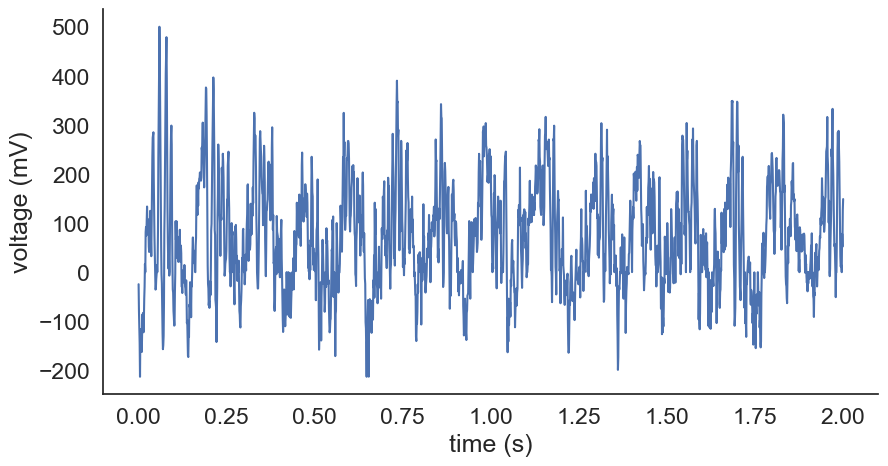

In [138]:
plt.figure(figsize=(10,5))
plt.plot(np.linspace(0,2,2000),lfp[:2000])
plt.xlabel('time (s)')
plt.ylabel('voltage (mV)')

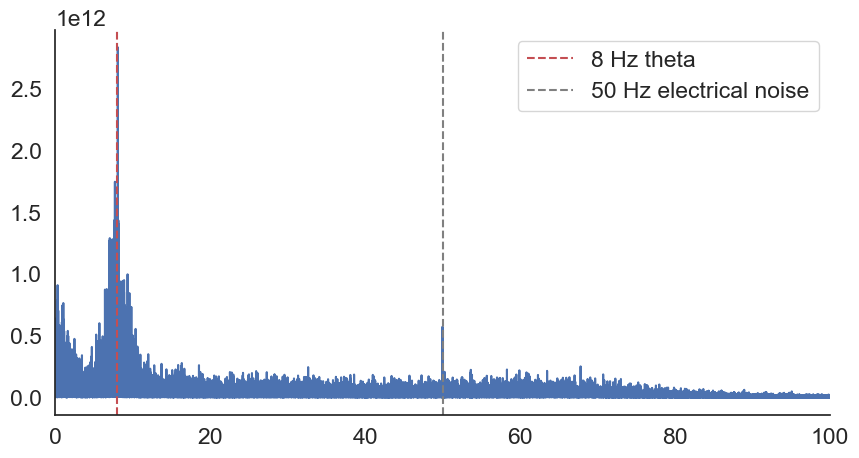

In [139]:
from scipy.fft import fft, fftfreq

n_samples = len(lfp)
sample_dt = 1. / sampling_rate

# we subtract the mean to get rid of the 0 frequency component in the spectrum
centered_lfp = lfp - np.mean(lfp)

transformed_signal = fft(centered_lfp) 

frequencies = fftfreq(n_samples,sample_dt) 

transformed_signal = transformed_signal[:n_samples//2]
frequencies = frequencies[:n_samples//2]

power = abs(transformed_signal)**2

plt.figure(figsize = (10,5))
plt.plot(frequencies,power)
plt.xlim([0,100]) # restrict to 
plt.axvline(x=8 ,c='r',linestyle='--',label='8 Hz theta')
plt.axvline(x=50 ,c='grey',linestyle='--',label='50 Hz electrical noise')

plt.legend()

A nice figure showing the distribution of the frequencies, with the 50Hz line noise as artifact. 

Text(0, 0.5, 'voltage (mV)')

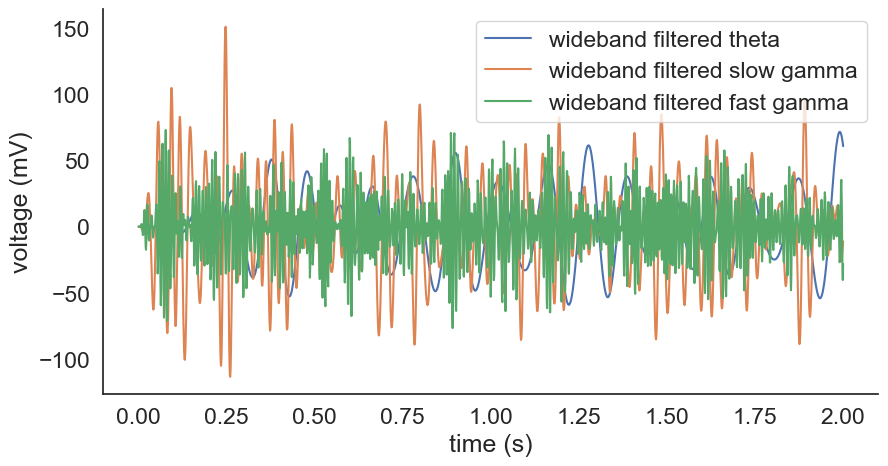

In [140]:
from scipy.signal import butter
from scipy.signal import sosfilt

filter_order = 5 #the higher the order, the sharper the filter frequency response, 
                 #but with more computations and potential numerical instability
low_f1 = 8
high_f1 = 12

low_f2 = 20
high_f2 = 45

low_f3 = 90
high_f3 = 140
#define filter object
filter1 = butter(filter_order,[low_f1,high_f1],
                btype='band', 
                output='sos', 
                fs=sampling_rate)
filter2 = butter(filter_order,[low_f2,high_f2],
                btype='band', 
                output='sos', 
                fs=sampling_rate)
filter3 = butter(filter_order,[low_f3,high_f3],
                btype='band', 
                output='sos', 
                fs=sampling_rate)
                
#apply filter to lfp       
wideband_lfp1 = sosfilt(filter1, lfp)
wideband_lfp2 = sosfilt(filter2, lfp)
wideband_lfp3 = sosfilt(filter3, lfp)

plt.figure(figsize=(10,5))
# plt.plot(np.linspace(0,2,2000),lfp[:2000],label='raw signal')
plt.plot(np.linspace(0,2,2000),wideband_lfp1[:2000],label = 'wideband filtered theta')
plt.plot(np.linspace(0,2,2000),wideband_lfp2[:2000],label = 'wideband filtered slow gamma')
plt.plot(np.linspace(0,2,2000),wideband_lfp3[:2000],label = 'wideband filtered fast gamma')
plt.xlabel('time (s)')
plt.legend()
plt.ylabel('voltage (mV)')


I've applied three different filters and removed the raw signal from the plot for better visualization. I applied a Theta 8-12 (blue), slow gamma 12-45 (orange), and fast gamma 90-140 filter (green) over the raw signal. It's clear how the different filters allow for the visualization of different frequency spectra. 

Text(0, 0.5, 'voltage (mV)')

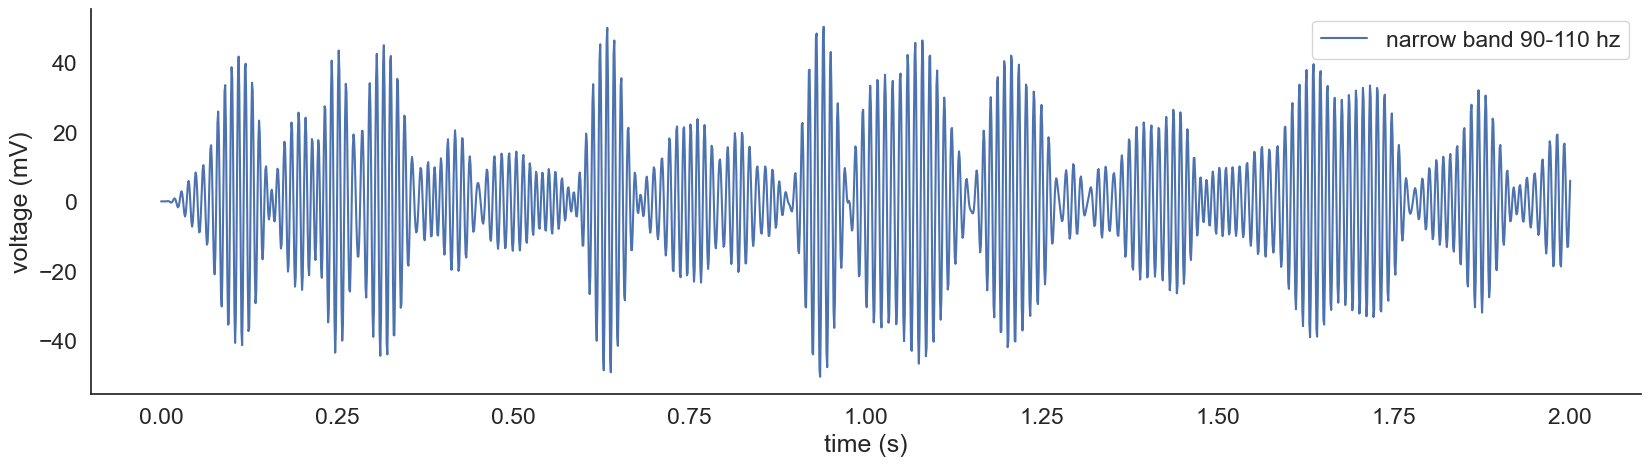

In [141]:
from scipy.signal import butter
from scipy.signal import sosfilt

filter_order = 5 #the higher the order, the sharper the filter frequency response, 
                 #but with more computations and potental numerical instability
low_f1 = 90
high_f1 = 110

low_f2 = 50
high_f2 = 150

low_f3 = 1
high_f3 = 100
#define filter object
filter1narrow = butter(filter_order,[low_f1,high_f1],
                btype='band', 
                output='sos', 
                fs=sampling_rate)
filter2wide = butter(filter_order,[low_f2,high_f2],
                btype='band', 
                output='sos', 
                fs=sampling_rate)
                
#apply filter to lfp       
wideband_lfp1 = sosfilt(filter1narrow, lfp)
wideband_lfp2 = sosfilt(filter2wide, lfp)
wideband_lfp3 = sosfilt(filter3, lfp)

plt.figure(figsize=(20,5))
#plt.plot(np.linspace(0,2,2000),lfp[:2000],label='raw signal')
plt.plot(np.linspace(0,2,2000),wideband_lfp1[:2000],label = 'narrow band 90-110 hz')
plt.legend()
plt.xlabel('time (s)')
plt.ylabel('voltage (mV)')

Text(0, 0.5, 'voltage (mV)')

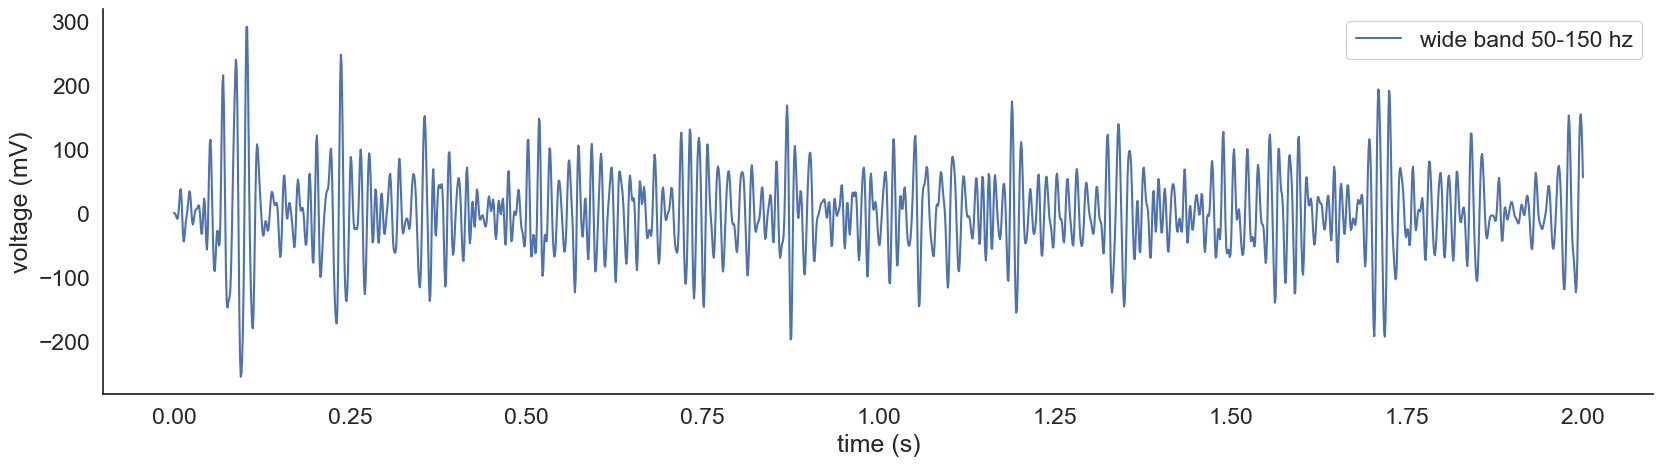

In [142]:
plt.figure(figsize=(20,5))
plt.plot(np.linspace(0,2,2000),wideband_lfp2[:2000],label = 'wide band 50-150 hz')
plt.legend()
plt.xlabel('time (s)')
plt.ylabel('voltage (mV)')

Text(0, 0.5, 'voltage (mV)')

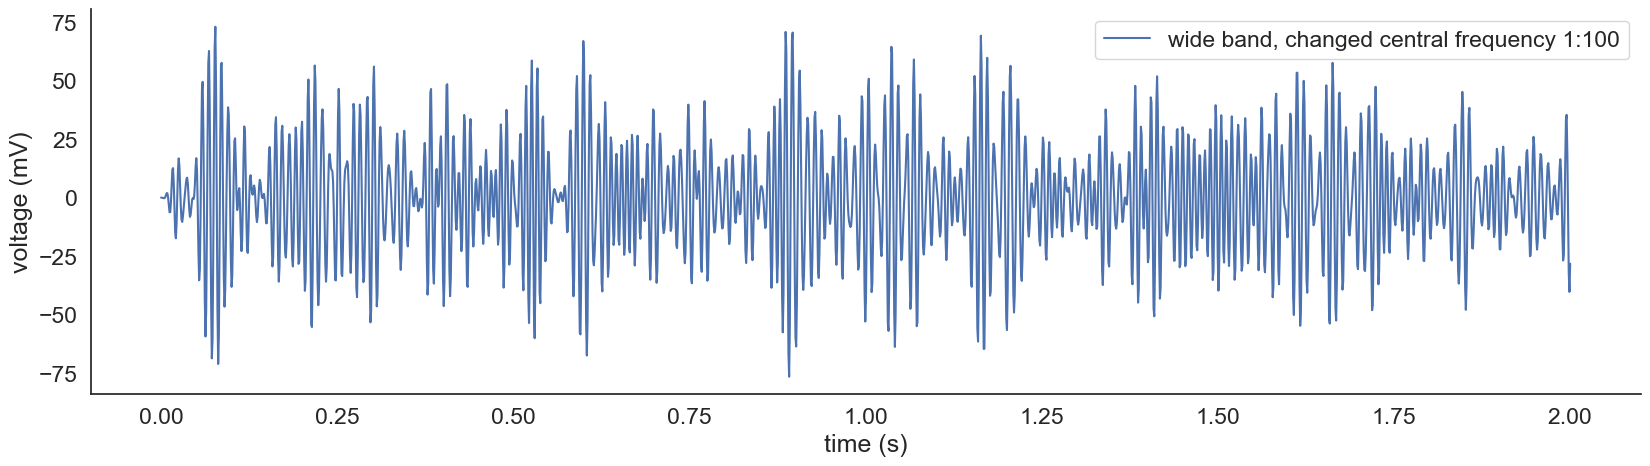

In [143]:
plt.figure(figsize=(20,5))
plt.plot(np.linspace(0,2,2000),wideband_lfp3[:2000],label = 'wide band, changed central frequency 1:100')
plt.legend()
plt.xlabel('time (s)')
plt.ylabel('voltage (mV)')

I've changed the width of the filter while keeping the central frequency similar around 100hz. The narrow filter passes the signals from 90 to 110 hz while the wide filter passes the signal from 50 to 150 hz. I've omitted the raw signal from the plot. For the wide filter with different central frequency I shifted the central frequency 50 hz downwards. 
We can see that making the filter wider, we are able to distinguish the oscilattory theta component, while a lot of information on the signal is lost if the filter is too narrow, but this can be useful when you want to isolate a certain physiologically relevant LFP signal frequency. 

Text(0, 0.5, 'voltage (mV)')

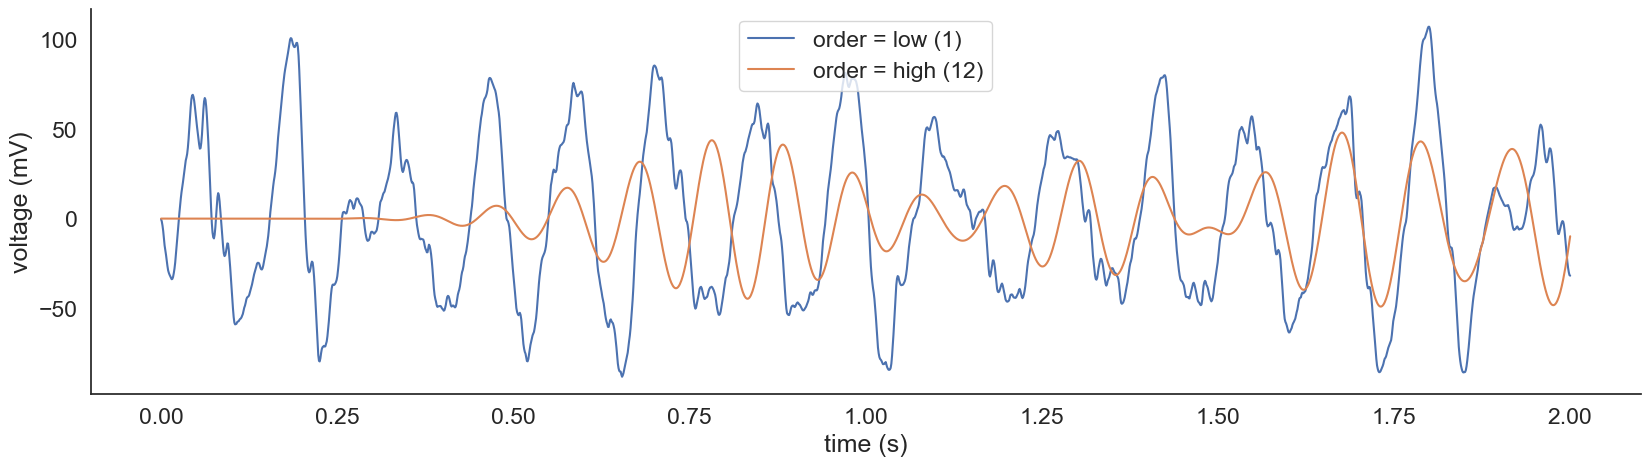

In [144]:
from scipy.signal import butter
from scipy.signal import sosfilt

filter_order = 1 #the higher the order, the sharper the filter frequency response, 
                 #but with more computations and potental numerical instability
filter_order2 = 12
low_f1 = 8
high_f1 = 12

#define filter object
filter1narrow = butter(filter_order,[low_f1,high_f1],
                btype='band', 
                output='sos', 
                fs=sampling_rate)
filter1narroworderchanged = butter(filter_order2,[low_f1,high_f1],
                btype='band', 
                output='sos', 
                fs=sampling_rate)
#apply filter to lfp       
wideband_lfp1 = sosfilt(filter1narrow, lfp)
changedorder = sosfilt(filter1narroworderchanged, lfp)

plt.figure(figsize=(20,5))
#plt.plot(np.linspace(0,2,2000),lfp[:2000],label='raw signal')
plt.plot(np.linspace(0,2,2000),wideband_lfp1[:2000],label = 'order = low (1)')
plt.plot(np.linspace(0,2,2000),changedorder[:2000],label = 'order = high (12)')

plt.legend()
plt.xlabel('time (s)')
plt.ylabel('voltage (mV)')

The order of a filter is a measure of its complexity and performance, it measures how steeply the the filter attenuates the frequencies outside the passband, and how much ripple variation occurs in the pass band. I can see that the lower order filtered signal contains much more noise. Higher order filters have a steeper roll-off beyond their cutoff frequency. This means that frequencies above the cutoff are more effectively attenuated, reducing the amount of higher-frequency noise or interference that might otherwise affect the LFP. Measuring the computation time, when I increase the order of the filter, I increase the time it takes to run the code, i quantified the time it takes (low order 0.2s, high order 0.3s). I can also imagine that the low ordered filter data takes up more disk space.  

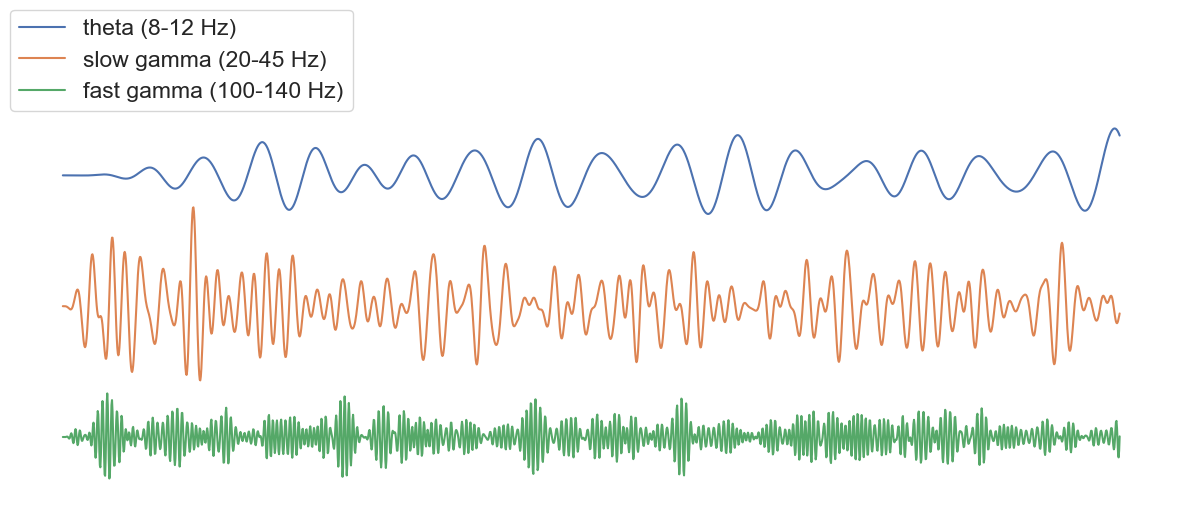

In [145]:
theta_lfp = lf.bandpass_filter(lfp,low_f=8,high_f=12, sampling_rate=sampling_rate)
slow_gamma_lfp = lf.bandpass_filter(lfp,low_f=20,high_f=45, sampling_rate=sampling_rate)
fast_gamma_lfp = lf.bandpass_filter(lfp,low_f=100,high_f=140, sampling_rate=sampling_rate)

plot_offset = 200 #to plot the signal on different lines

plt.figure(figsize=(15,5))
plt.plot(theta_lfp[:2000]+2*plot_offset,label='theta (8-12 Hz)')
plt.plot(slow_gamma_lfp[:2000]+plot_offset,label = 'slow gamma (20-45 Hz)')
plt.plot(fast_gamma_lfp[:2000],label = 'fast gamma (100-140 Hz)')

plt.axis('off')
plt.legend(loc=(0,1))

## Exercise 2: wavelet transform with real wavelets
---
In this exercises you will explore the difference between real and complex wavelets in the continous wavelet transform.
- Import the data form `data/moving_lfp.pickle`
- Select a period of a few seconds of the signal and compute the spectrogram. 
  Try the wavelet transform with wavelet `mexh` (mexican hat),`gaus` (gaussian) and `morl` (morlet). These are all real wavelets.
- What differences do you see with respect to the spectrum computed with the complex Morlet tranform ? Comment on why do you think this might be the case.

In [146]:
from scipy import signal
from pywt import scale2frequency
from pywt import cwt

In [147]:
from ipywidgets import interact
import ipywidgets as widgets


def plot_wavelet(scale,freq):
    plt.figure(figsize=(10,5))
    wavelet = signal.morlet(1000,s=scale,w=freq)
    envelope = abs(wavelet)
    plt.plot(wavelet.real,label='wavelet (real part)')
    plt.plot(envelope, label = 'envelope')
    plt.legend(loc=[1,1])
    plt.axis('off')

interact(plot_wavelet, scale = widgets.FloatSlider(min=.05, max=2, value=.5),
                       freq = widgets.FloatSlider(min=1, max=20, value=5))

interactive(children=(FloatSlider(value=0.5, description='scale', max=2.0, min=0.05), FloatSlider(value=5.0, d…

<function __main__.plot_wavelet(scale, freq)>

In [148]:
from pywt import wavelist

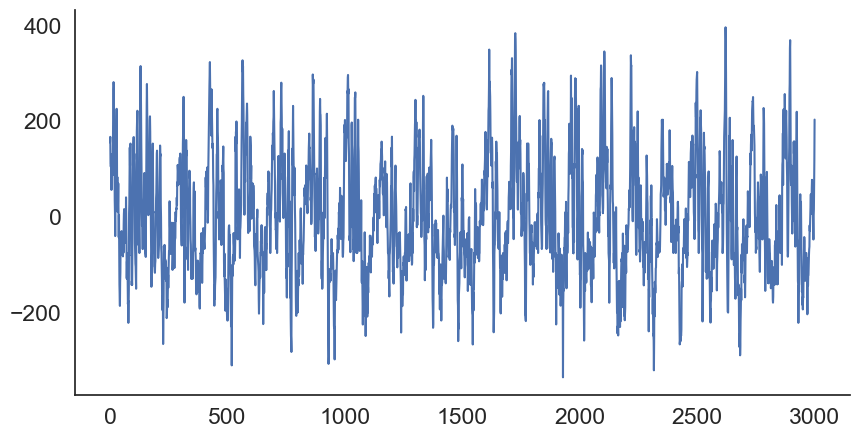

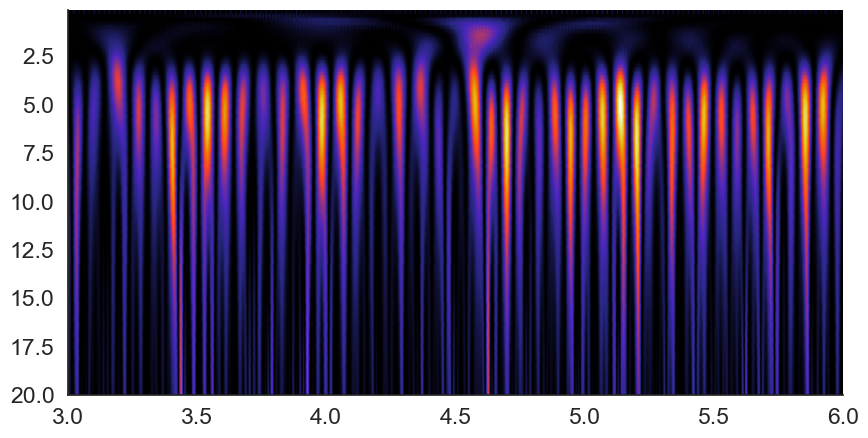

In [149]:
from pywt import scale2frequency
from pywt import cwt

start = 3 #in seconds
end = 6 # in seconds

sig = lfp[int(start*sampling_rate):int(end*sampling_rate)]
sig = sig - np.mean(sig) # get rid of 0 frequency component

plt.figure(figsize=(10,5))
plt.plot(sig)

#spectrogram with morlet transform

frequencies =  np.linspace(0.1,20,100)/sampling_rate
wavelet = 'gaus1'
scales = scale2frequency(wavelet, frequencies)
cwtmatr, _ = cwt(sig, wavelet=wavelet, scales=scales,
                  sampling_period=1.0/sampling_rate)
plt.figure(figsize=(10,5))
plt.imshow(abs(cwtmatr)**2, extent=[start,end,frequencies[-1]*sampling_rate,
                         frequencies[0]*sampling_rate], aspect='auto', cmap='CMRmap')


This spectrogram above uses the gaussian wavelet transform, I see very sharp valeys, indicating that the output of this wavelet is very wide.

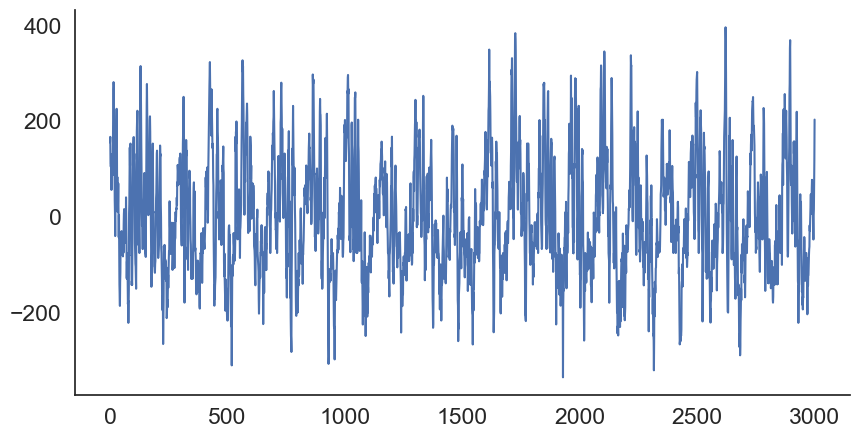

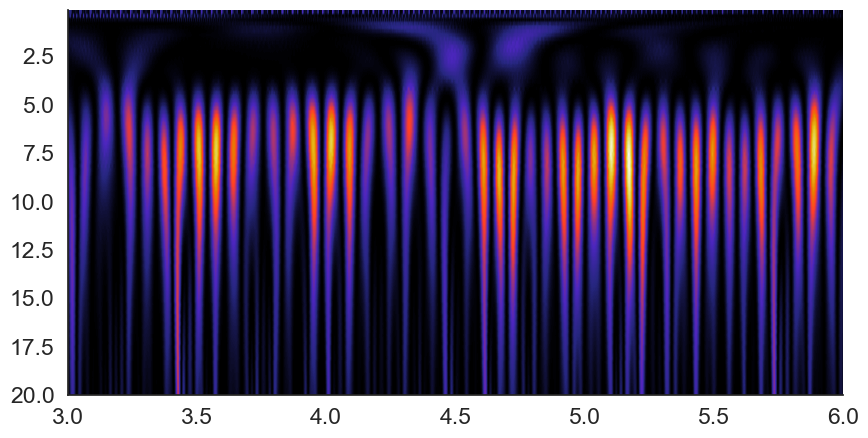

In [150]:
from pywt import scale2frequency
from pywt import cwt

start = 3 #in seconds
end = 6 # in seconds

sig = lfp[int(start*sampling_rate):int(end*sampling_rate)]
sig = sig - np.mean(sig) # get rid of 0 frequency component

plt.figure(figsize=(10,5))
plt.plot(sig)

#spectrogram with morlet transform

frequencies =  np.linspace(0.1,20,100)/sampling_rate
wavelet = 'mexh'
scales = scale2frequency(wavelet, frequencies)
cwtmatr, _ = cwt(sig, wavelet=wavelet, scales=scales,
                  sampling_period=1.0/sampling_rate)
plt.figure(figsize=(10,5))
plt.imshow(abs(cwtmatr)**2, extent=[start,end,frequencies[-1]*sampling_rate,
                         frequencies[0]*sampling_rate], aspect='auto', cmap='CMRmap')


this spectogram above uses the mexican hat wavelet transform, the result is similar to the gaussian wavelet, very wide and steep valleys.

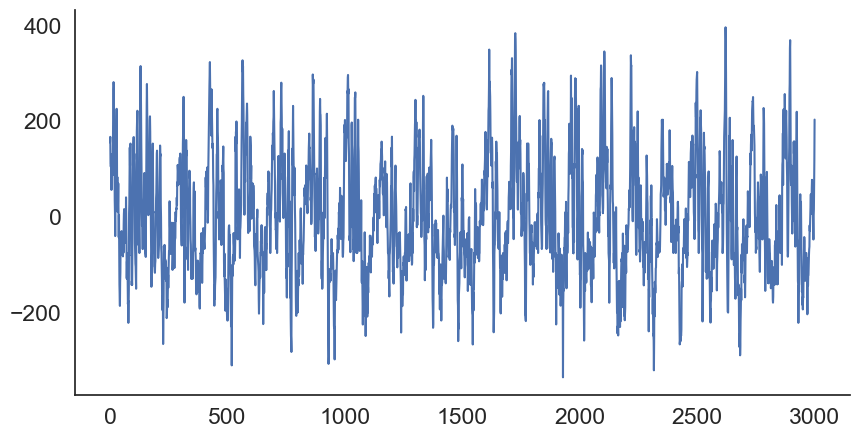

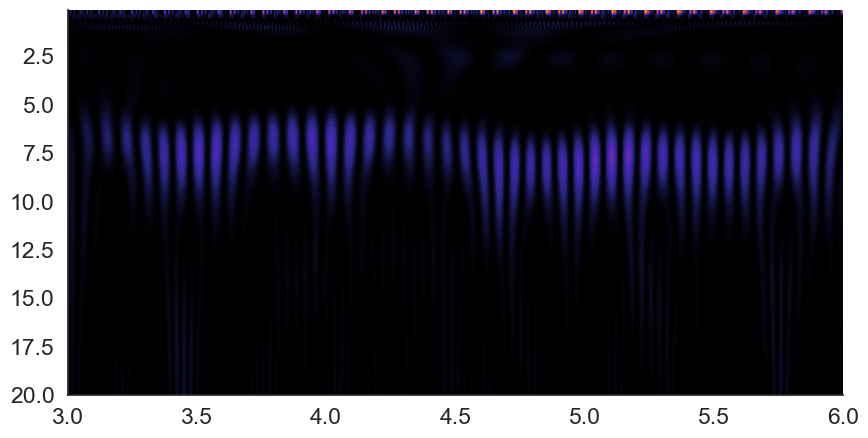

In [151]:
from pywt import scale2frequency
from pywt import cwt

start = 3 #in seconds
end = 6 # in seconds

sig = lfp[int(start*sampling_rate):int(end*sampling_rate)]
sig = sig - np.mean(sig) # get rid of 0 frequency component

plt.figure(figsize=(10,5))
plt.plot(sig)

#spectrogram with morlet transform

frequencies =  np.linspace(0.1,20,100)/sampling_rate
wavelet = 'morl'
scales = scale2frequency(wavelet, frequencies)
cwtmatr, _ = cwt(sig, wavelet=wavelet, scales=scales,
                  sampling_period=1.0/sampling_rate)
plt.figure(figsize=(10,5))
plt.imshow(abs(cwtmatr)**2, extent=[start,end,frequencies[-1]*sampling_rate,
                         frequencies[0]*sampling_rate], aspect='auto', cmap='CMRmap')


this spectogram uses the morlet wavelet transform
the plot displays time on the x axis and frequency on the y axis, the colour intensity indicates the power intensity or magnitude. The differences in these spectograms originate from the nature of the wavelet used. The shapes in the plot represent oscillatory components with varying frequencies and time localized characteristics. The choice of wavelet affects the type of information extracted from the signal, because The different wavelets emphasize different aspects of the signal by their different shapes (mexican hat, guassian, and morlet). It seems that the morlet wavelet transformer gives a more specific signal with less noise and the other two allow for much more visualization of wider frequencies.  

Text(0, 0.5, 'power (a.u.)')

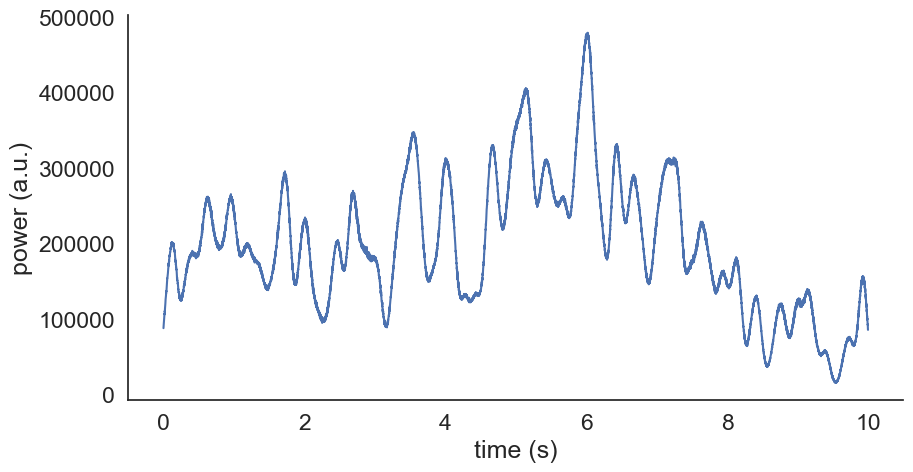

In [152]:
start = 0 #in seconds
end = 10 # in seconds

sig = lfp[int(start*sampling_rate):int(end*sampling_rate)]
sig = sig - np.mean(sig) # get rid of 0 frequency component

frequencies =  np.linspace(6,10,50)/sampling_rate
wavelet = 'cmor1.0-1.0'
scales = scale2frequency(wavelet, frequencies)
cwtmatr, _ = cwt(sig, wavelet=wavelet, scales=scales,
                  sampling_period=1.0/sampling_rate)

power = np.mean(abs(cwtmatr)**2,axis=0)

plt.figure(figsize=(10,5))
plt.plot(np.linspace(start,end,len(power)),power)
plt.xlabel('time (s)')
plt.ylabel('power (a.u.)')

## Exercise 3: REM sleep detection
---
Mammalian sleep is organized in different phases. [Rapid Eye Movement (REM) sleep](https://en.wikipedia.org/wiki/Rapid_eye_movement_sleep) is a well studied phase, with clear markers that make it detectable from LFP data. One of the most used marker is the ratio (or difference) between the oscillatory power in the theta and delta bands in the hippocampus. During REM sleep, the former dominates, in a pattern that resembles active behaviour.  
In this exercise we will use the tools we learned about to detect and inspect the REM and non-REM (nREM) phases of sleep in data recorded from the hippocampus of a sleeping mouse.

- Import the data form `data/moving_lfp.pickle`
- Compute the instantaneous power in the theta (6-10 Hz) and delta (2-4 Hz) frequency bands, for the whole signal.
- z-score the two power signals (subtract the mean and divide by the standard deviation, you can use `scipy.stats.zscore()`)
- Compute and plot the power difference (`theta_power - delta_power`) for the sleep session.
- Compute the REM (power difference $>0.2$) and nREM (power diffewrence $<0.2$) sleep periods.
- Plot examples of REM vs nREM lfp signals (wideband filtered betw. 1 and 200 Hz to get rid of some of the noise).
- Explore how changing the threshold affects the amount of REM sleep detected.

In [153]:
with open('data/moving_lfp.pickle', 'rb') as handle:
    lfp_data = pickle.load(handle)

lfp = lfp_data['lfp']
sampling_rate = lfp_data['sampling_rate']
print(f'Loaded {len(lfp)/sampling_rate} seconds of LFP, sampled at {sampling_rate} Hz')

Loaded 600.133 seconds of LFP, sampled at 1000.0 Hz


Text(0, 0.5, 'voltage (mV)')

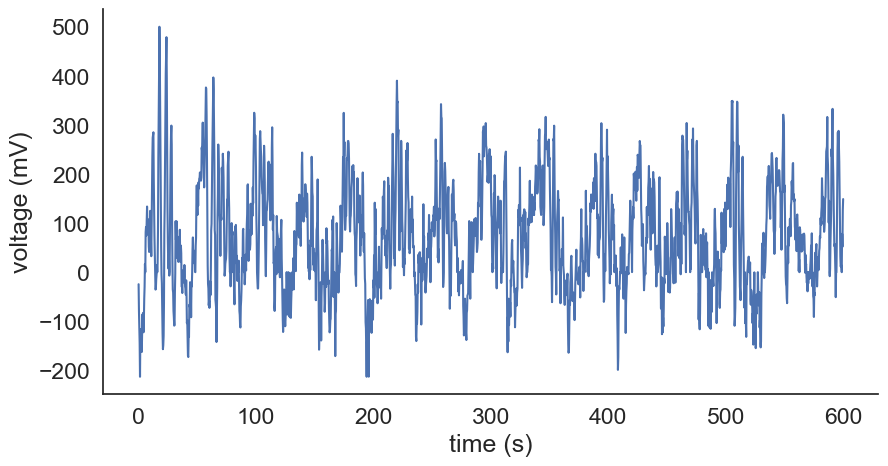

In [154]:
plt.figure(figsize=(10,5))
plt.plot(np.linspace(0,600,2000),lfp[:2000])
plt.xlabel('time (s)')
plt.ylabel('voltage (mV)')

I start by computing the instantaneous power in the theta spectrum: 

In [155]:
from pywt import wavelist

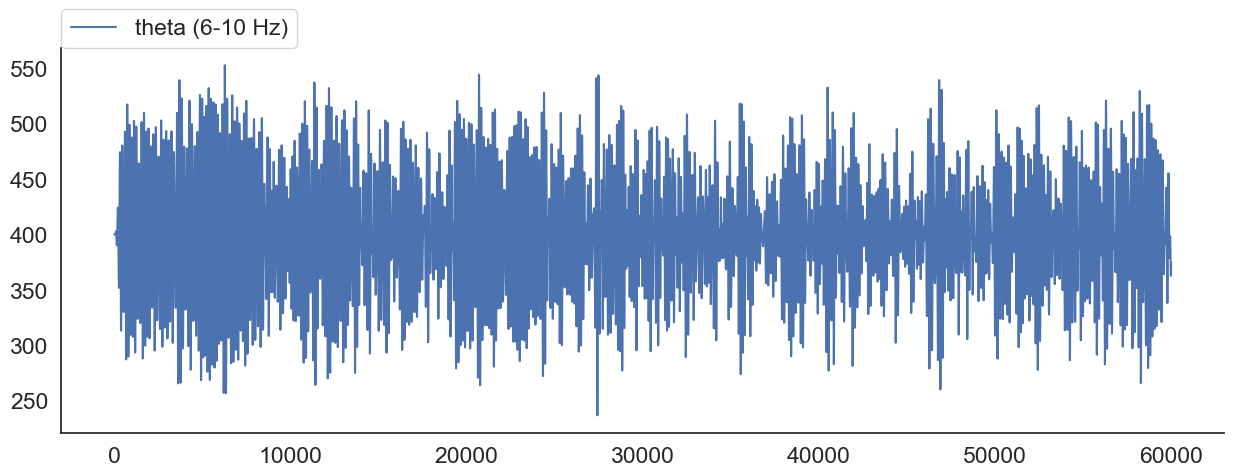

In [156]:
theta_lfp = lf.bandpass_filter(lfp,low_f=6,high_f=10, sampling_rate=sampling_rate)

plot_offset = 200 #to plot the signal on different lines

plt.figure(figsize=(15,5))
plt.plot(theta_lfp[:60000]+2*plot_offset,label='theta (6-10 Hz)')

plt.axis('on')
plt.legend(loc=(0,1))

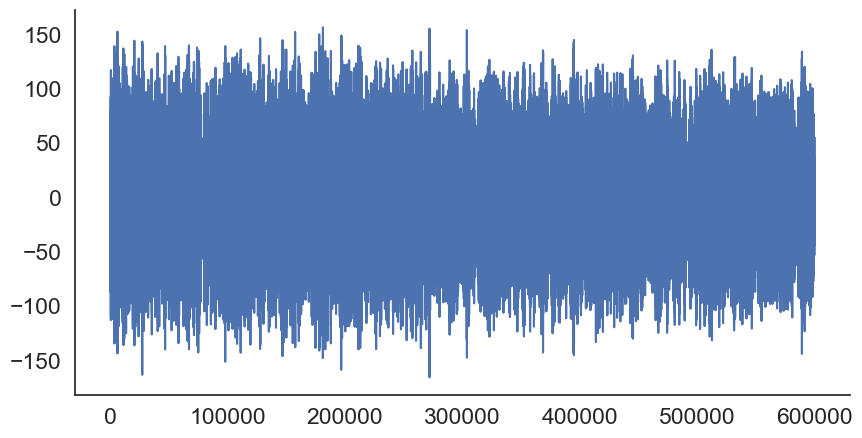

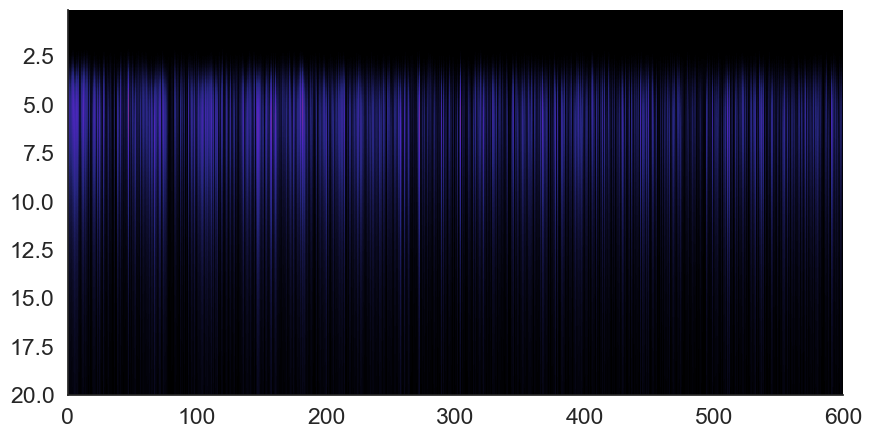

In [157]:
from pywt import scale2frequency
from pywt import cwt

start = 0 #in seconds
end = 600 # in seconds

sigt = theta_lfp[int(start*sampling_rate):int(end*sampling_rate)]
sigt = sigt - np.mean(sigt) # get rid of 0 frequency component

plt.figure(figsize=(10,5))
plt.plot(sigt)

#spectrogram with morlet transform

frequencies =  np.linspace(0.1,20,100)/sampling_rate
wavelet = 'gaus1'
scales = scale2frequency(wavelet, frequencies)
cwtmatr, _ = cwt(sigt, wavelet=wavelet, scales=scales,
                  sampling_period=1.0/sampling_rate)
plt.figure(figsize=(10,5))
plt.imshow(abs(cwtmatr)**2, extent=[start,end,frequencies[-1]*sampling_rate,
                         frequencies[0]*sampling_rate], aspect='auto', cmap='CMRmap')


This is the wavelet transform plot with the instantaneous power of the theta frequency. 

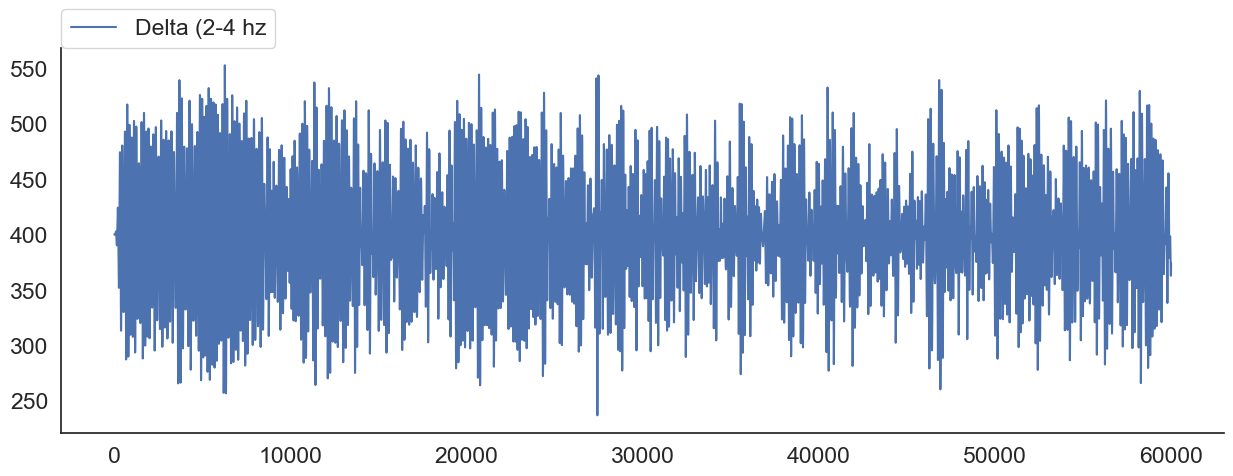

In [158]:
delta_lfp = lf.bandpass_filter(lfp,low_f=2,high_f=4, sampling_rate=sampling_rate)

plot_offset = 200 #to plot the signal on different lines

plt.figure(figsize=(15,5))
plt.plot(theta_lfp[:60000]+2*plot_offset,label='Delta (2-4 hz')

plt.axis('on')
plt.legend(loc=(0,1))

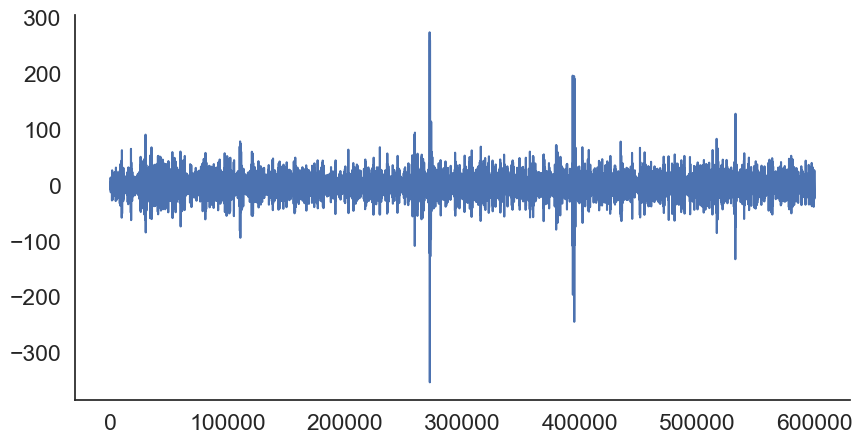

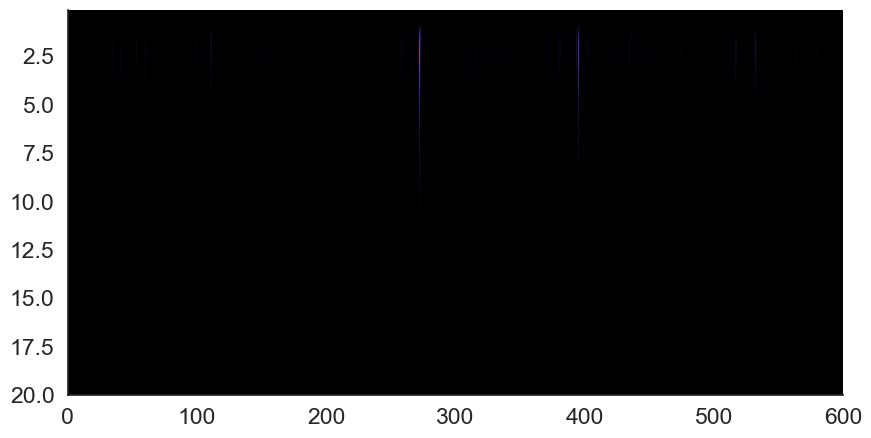

In [159]:
from pywt import scale2frequency
from pywt import cwt

start = 0 #in seconds
end = 600 # in seconds

sigd = delta_lfp[int(start*sampling_rate):int(end*sampling_rate)]
sigd = sigd - np.mean(sigd) # get rid of 0 frequency component

plt.figure(figsize=(10,5))
plt.plot(sigd)

#spectrogram with morlet transform

frequencies =  np.linspace(0.1,20,100)/sampling_rate
wavelet = 'gaus1'
scales = scale2frequency(wavelet, frequencies)
cwtmatr, _ = cwt(sigd, wavelet=wavelet, scales=scales,
                  sampling_period=1.0/sampling_rate)
plt.figure(figsize=(10,5))
plt.imshow(abs(cwtmatr)**2, extent=[start,end,frequencies[-1]*sampling_rate,
                         frequencies[0]*sampling_rate], aspect='auto', cmap='CMRmap')


This is the wavelet transform plot with the instantaneous power of the delta frequency. 

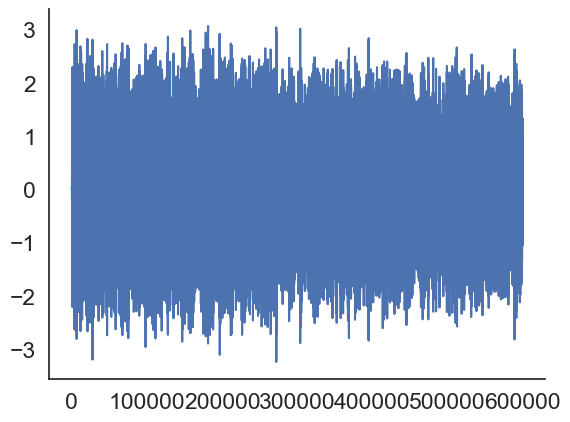

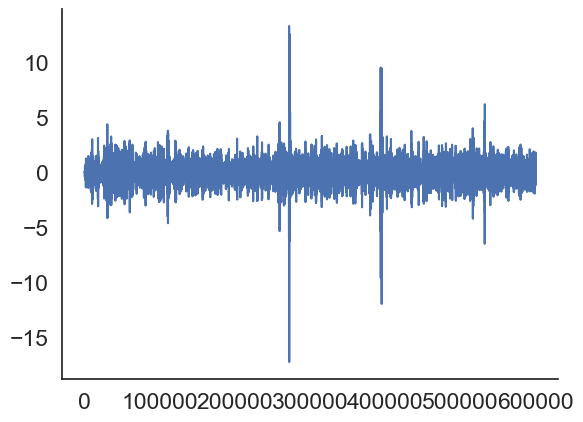

In [182]:
import scipy as scipy
from scipy import stats
from scipy.stats import zscore

#calculating the z-score of both signals
Zscoretheta_lfp = zscore(theta_lfp)
plt.plot(Zscoretheta_lfp)
plt.show()


Zscoredelta_lfp = zscore(delta_lfp)
plt.plot(Zscoredelta_lfp)
plt.show()


I've plotted the Z-scores from theta and delta LFP frequency power in the above plots. 

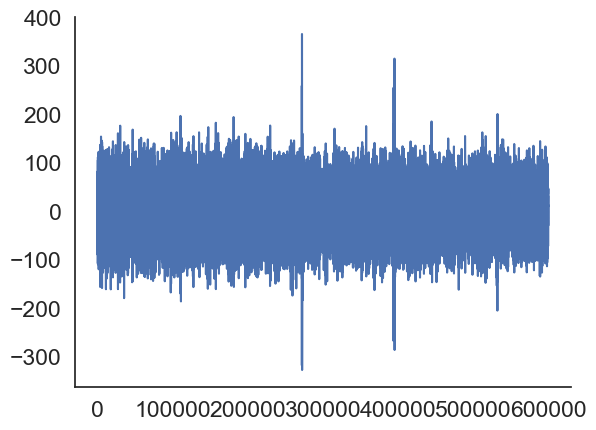

In [187]:
lfp_dif = np.subtract(sigt, sigd)
plt.plot(lfp_dif)
plt.show()

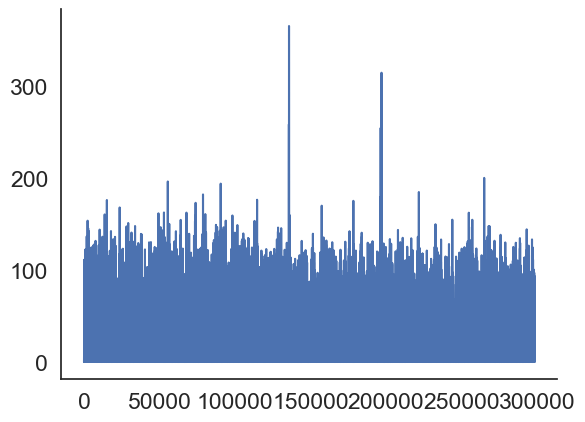

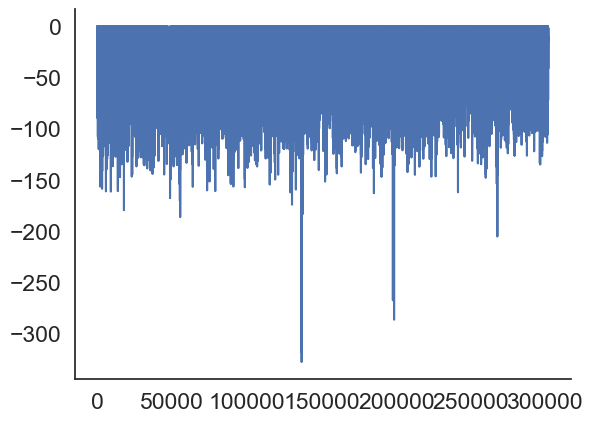

In [204]:
REMpower = lfp_dif[lfp_dif > 0.2]
plt.plot(REMpower)
plt.show()

nREMpower = lfp_dif[lfp_dif < 0.3]
plt.plot(nREMpower)
plt.show()

There seems to be an issue, I can not find a way to plot the REM and nREM signal. Perhaps from computing the instantaneous power calculation is wrong.